In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2022-09-19 14:22:12--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.2'

     0K .......... .......... .......... .......... ..........  3% 1.75M 1s
    50K .......... .......... .......... .......... ..........  7% 4.61M 0s
   100K .......... .......... .......... .......... .......... 10% 3.01M 0s
   150K .......... .......... .......... .......... .......... 14% 5.78M 0s
   200K .......... .......... .......... .......... .......... 17% 6.69M 0s
   250K .......... .......... .......... .......... .......... 21% 3.75M 0s
   300K .......... .......... .......... .......... .......... 25% 5.87M 0s
   350K .......... .......... 

## EDA

- Load the data.
- Look at the median_house_value variable. Does it have a long tail? 

**It does not seem that the median_house variable is long tailed at first glance**


In [2]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

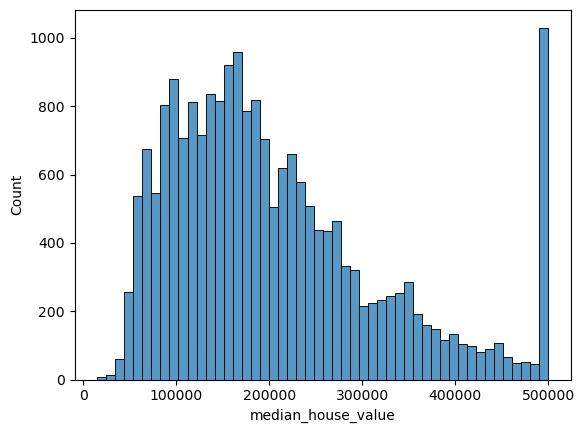

In [4]:
sns.histplot(df['median_house_value'], bins = 50)

In [5]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
    #,'median_house_value'
]

## Question 1

Find a feature with missing values. How many missing values does it have? **207**


In [6]:
df.isnull().sum(axis = 0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'population'? **1166**


In [7]:
df['population'].median()

1166.0

## Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [8]:
n = df.shape[0]

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_train, n_val, n_test, n_train + n_val + n_test)

20640 12384 4128 4128 20640


In [9]:
idx = np.arange(n)

np.random.seed(42) 
np.random.shuffle(idx)

print(idx)

[20046  3024 15663 ...  5390   860 15795]


In [10]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(12384, 10)
(4128, 10)
(4128, 10)


In [11]:
df_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY


In [12]:
df_val.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19660,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0,INLAND
4415,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0,<1H OCEAN
18113,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0,<1H OCEAN


In [13]:
df_test.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9221,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0,INLAND
10234,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0,<1H OCEAN
4763,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0,<1H OCEAN


In [14]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [15]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [16]:
del df_train['ocean_proximity']
del df_val['ocean_proximity']
del df_test['ocean_proximity']

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

**If we round them to 2 digits both are equally good. If we do not round scores filling with mean is slightly better**


In [17]:
df_train.isnull().sum(axis = 0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [18]:
df_val.isnull().sum(axis = 0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [19]:
df_test.isnull().sum(axis = 0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [20]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [23]:
def prepare_X(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [24]:
X_train_1 = df_train[features].fillna(0).values
X_train_2 = df_train[features].fillna(df_train['total_bedrooms'].mean()).values
X_train_3 = prepare_X(df_train)

df_train['total_bedrooms'].mean()

533.4803317730147

In [25]:
#print(X_train_1, '\n\n')
#print(X_train_2, '\n\n')
#print(X_train_3, '\n\n')

In [26]:
w0_1, w_1 = train_linear_regression(X_train_1, y_train) #filled with 0

w0_2, w_2 = train_linear_regression(X_train_2, y_train) #filled with mean

w0_3, w_3 = train_linear_regression(X_train_3, y_train) #filled with 0 using func from the lesson notebook

X_val = prepare_X(df_val)

y_pred_1 = w0_1 + X_val.dot(w_1)
y_pred_2 = w0_2 + X_val.dot(w_2)
y_pred_3 = w0_3 + X_val.dot(w_3)

score_1 = rmse(y_val, y_pred_1)
score_2 = rmse(y_val, y_pred_2)
score_3 = rmse(y_val, y_pred_3)

print(score_1)
print(score_2)
print(score_3)

print(round(score_1, 2))
print(round(score_2, 2))
print(round(score_3, 2))

0.3295330365231347
0.32901954390040355
0.3295330365231347
0.33
0.33
0.33


## Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r. **0**


In [28]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [29]:
X_train_4 = prepare_X(df_train)

w0_4, w_4 = train_linear_regression_reg(X_train_4, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred_4 = w0_4 + X_val.dot(w_4)
score_4 = rmse(y_val, y_pred_4)
print(score_4)

0.3295319365989469


In [35]:
scores_dict = {}

for r_val in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    X_train_4 = prepare_X(df_train)  
    w0_4, w_4 = train_linear_regression_reg(X_train_4, y_train, r = r_val)
    
    X_val = prepare_X(df_val)
    y_pred_4 = w0_4 + X_val.dot(w_4)
    score_4 = rmse(y_val, y_pred_4)
    scores_dict[r_val] = round(score_4,2)
    
dict(sorted(scores_dict.items(), key=lambda item: item[1])) 

{0: 0.33,
 1e-06: 0.33,
 0.0001: 0.33,
 0.001: 0.33,
 0.01: 0.33,
 0.1: 0.33,
 1: 0.33,
 5: 0.34,
 10: 0.34}

## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3)) **0.0042**


In [37]:
df_5 = df.copy()

In [48]:
scores_seeds = {}
scores_s = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    idx = np.arange(n)
    np.random.seed(s) 
    np.random.shuffle(idx)
    
    df_train_5 = df_5.iloc[idx[:n_train]]
    df_val_5 = df_5.iloc[idx[n_train : n_train + n_val]]
    df_test_5 = df_5.iloc[idx[n_train + n_val :]]
    
    y_train_5 = np.log1p(df_train_5['median_house_value'].values)
    y_val_5 = np.log1p(df_val_5['median_house_value'].values)
    y_test_5 = np.log1p(df_test_5['median_house_value'].values)
    
    
    del df_train_5['median_house_value']
    del df_val_5['median_house_value']
    del df_test_5['median_house_value']
    
    del df_train_5['ocean_proximity']
    del df_val_5['ocean_proximity']
    del df_test_5['ocean_proximity']
    
    X_train_5 = prepare_X(df_train_5)

    w0_5, w_5 = train_linear_regression(X_train_5, y_train_5)

    X_val_5 = prepare_X(df_val_5)
    
    y_pred_5 = w0_5 + X_val_5.dot(w_5)
    score_5 = rmse(y_val_5, y_pred_5)
    print(s, ' : ', score_5)
    
    scores_seeds[s] = score_5
    scores_s = np.append(scores_s, score_5)


0  :  0.33884304805295884
1  :  0.3362387255955875
2  :  0.3320912318844027
3  :  0.34051536090355167
4  :  0.3389024066572691
5  :  0.3434866725719515
6  :  0.3451980953098988
7  :  0.3395989927404383
8  :  0.3466230873192809
9  :  0.3365926124192128


In [52]:
(round(np.std(scores_s), 4))

0.0042

## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset? **0.33659**


In [68]:
idx = np.arange(n)
np.random.seed(9) 
np.random.shuffle(idx)
    
df_train_6 = df_5.iloc[idx[:n_train]]
df_val_6 = df_5.iloc[idx[n_train : n_train + n_val]]
df_test_6 = df_5.iloc[idx[n_train + n_val :]]

y_train_6 = np.log1p(df_train_6['median_house_value'].values)
y_val_6 = np.log1p(df_val_6['median_house_value'].values)
y_test_6 = np.log1p(df_test_6['median_house_value'].values)  


In [69]:
df_train_val = pd.concat([df_train_6, df_val_6])

display(df_train_val)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20558,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526,154400.0,INLAND
11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,281500.0,<1H OCEAN
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0,NEAR OCEAN
14267,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933,86300.0,NEAR OCEAN
3684,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563,176400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
9909,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550,137500.0,NEAR BAY
3531,-118.54,34.27,28.0,2309.0,300.0,931.0,302.0,6.7415,348200.0,<1H OCEAN
7735,-118.13,33.93,34.0,2122.0,517.0,1578.0,488.0,3.1496,191900.0,<1H OCEAN
4350,-118.37,34.11,42.0,5518.0,979.0,1863.0,957.0,8.5842,500001.0,<1H OCEAN


In [70]:
y_train_val = []
y_train_val = np.append(y_train_val, y_train_6)
y_train_val = np.append(y_train_val, y_val_6)
y_train_val

array([11.94730839, 12.54789128, 11.23981668, ..., 12.16473489,
       13.12236738, 12.9567833 ])

In [71]:
del df_train_val['median_house_value']
del df_test_6['median_house_value']

del df_train_val['ocean_proximity']
del df_test_6['ocean_proximity']


In [72]:
X_train_6 = prepare_X(df_train_val)

w0_6, w_6 = train_linear_regression_reg(X_train_6, y_train_val, 0.001)

X_test_6 = prepare_X(df_test_6)
    
y_pred_6 = w0_6 + X_test_6.dot(w_6)
score_6 = rmse(y_test_6, y_pred_6)
print(round(score_5, 5))

0.33659
